# AMATH 352B

## Homework Assignment #8 - due 6/3/2022

This Jupyter Notebook consists of several cells.  Some of the cells are **Markdown** cells, and some of the cells are **Code** cells.

Once you have honed your Notebook to the point where you're ready to turn it in, convert the Notebook to HTML and upload both the Notebook (the .ipynb file) and the HTML version of it to Canvas.  There are potentially issues in the conversion involving figures, graphics, and imported files to solve, so leave yourself enough time to get this done.

In [1]:
from math import *
import numpy as np
from scipy.linalg import lu_factor, lu_solve
from scipy.linalg import qr, solve_triangular
import matplotlib as mpl
import matplotlib.pyplot as plt

## Problem #1

Determine an orthogonal basis for $\hbox{ker}(A)$ and an orthogonal basis for $\hbox{ran}(A^T)$ by calling the numpy routine ``np.linalg.svd``:

$$A=\begin{pmatrix}1 & 2 & 3\cr 4 & 5 & 6\cr\end{pmatrix}$$

In [2]:
A = np.array(([1, 2, 3],
              [4, 5, 6]))
m = 2
n = 3
u, s, vt = np.linalg.svd(A)

nonzerosingular = 0
for i in range (s.size):
    if (abs(s[i]) > sqrt(np.finfo(float).eps)):
        nonzerosingular += 1
        
print("Non-zero singular values =", nonzerosingular)

#The matrix Σ has exactly "d" non-zero singular values
#Then the last n−d columns of V form a basis for ker(A)

kernel_basis = vt.T[:,2]
print("Kernel basis:", "\n", kernel_basis, "\n")

#The first d columns of V form a basis for ran(A.T)
range_basis = vt.T[:, 0:nonzerosingular]
print("Range basis:", "\n", range_basis)

Non-zero singular values = 2
Kernel basis: 
 [ 0.40824829 -0.81649658  0.40824829] 

Range basis: 
 [[-0.42866713 -0.80596391]
 [-0.56630692 -0.11238241]
 [-0.7039467   0.58119908]]


## Problem #2

For the matrix given in Problem #1, determine the minimum norm solution to

$$Ax=\begin{pmatrix}1\cr 1\cr\end{pmatrix}$$

In [3]:
# we can solve this problem with the SVD
rhs = np.array(([1, 1]))
u, s, vt = np.linalg.svd(A)
utb = u.T @ rhs / s
soln = utb[0] * vt[0] + utb[1] * vt[1] #+ utb[2] * vt[2]
print("Solution:", soln)
print("norm:", np.linalg.norm(soln))

Solution: [-5.00000000e-01 -3.46944695e-16  5.00000000e-01]
norm: 0.7071067811865477


## Problem #3

Determine another solution to the linear system given in Problem #2 by adding an appropriate vector from $\hbox{ker}(A)$ so that $\|x\|_2=1$

In [4]:
# norm^2 + (ker^2)x = 1
# (ker^2)x = 1 - norm^2
# x = (1 - norm) / (ker)
kernel_norm = np.sqrt((1-np.linalg.norm(soln, 2) ** 2) / (np.linalg.norm(kernel_basis, 2) ** 2))
new_soln = soln + (kernel_norm * kernel_basis)
print(new_soln)
print(np.linalg.norm(new_soln))
print(A @ new_soln)

[-0.21132487 -0.57735027  0.78867513]
1.0
[1. 1.]


## Problem #4

Determine the mean of the points $(1, 1, 0, 0)$, $(1, 1, 1, 0)$, $(1, 1, 1, 1)$, $(0, 1, 1, 1)$, $(0, 0, 1, 1)$, and $(1, 2, 3, 4)$

In [5]:
pts = np.array([[1, 1, 0, 0], [1, 1, 1, 0], [1, 1, 1, 1], 
                [0, 1, 1, 1], [0, 0, 1, 1], [1, 2, 3, 4]]).T
mean = pts.mean(axis = 1)
print("mean:\n", mean)

mean:
 [0.66666667 1.         1.16666667 1.16666667]


## Problem #5

What is the principal direction of greatest variation for the six points given in Problem #4?

In [6]:
pts = np.array([[1, 1, 0, 0], [1, 1, 1, 0], [1, 1, 1, 1], 
                [0, 1, 1, 1], [0, 0, 1, 1], [1, 2, 3, 4]]).T
var = np.zeros(pts.shape)

var = pts - pts.mean(axis = 1)[:,None]
u, s, vt = np.linalg.svd(var)
print("principal direction of greatest variation:\n", u[:,0])

principal direction of greatest variation:
 [0.04659181 0.2481984  0.52977398 0.80967048]


## Problem #6

What is the principal direction of least variation for the six points given in Problem #6?

In [7]:
print("principal direction of least variation:\n", u[:,3])

principal direction of least variation:
 [ 0.57452173 -0.59511373 -0.39000443  0.40455034]


## Problem #7

Nigel is in the process of designing a new sailboat, and he plans for it to be fast enough to be competitive in Pacific Ocean races against some of the fastest boats in the world.  In order to do this, he needs to construct a cubic polynomial function of speed which comes as close as possible (in the least squares sense) to interpolating the following data:

| Speed | Performance |
|-------|-------------|
| 0 | 1 |
| 1 | 1 |
| 2 | 2 |
| 3 | 2 |
| 4 | 2 |
| 5 | 1 |
| 6 | 1 |

Suppose that the cubic polynomial function he needs to identify is denoted by $p$, and he needs $p$ to be the function of speed that best matches the desired performance in the chart.  In order for his boat to qualify, the function $p$ he constructs must satisfy

$$\int_0^6 p(s)ds=10$$

You have correctly identified Nigel's data fitting problem as a linearly constrained least squares problem, and you have kindly agreed to help him solve it.  Of course, you are additionally motivated by the fact that it is the very last homework problem you will ever need to solve in Applied Math 352.  Compute the coefficients of $p$ and plot it as well as the data points in the chart.

The following facts may or may not help you:

* The speed in the chart is given in knots
* The performance column is all about how well the boat handles in light air, hence the concern about speeds less than or equal to six knots
* The integral constraint given in the problem is a linear constraint
* Nigel needs this function in order to get a proper rating certificate for his boat
* Nigel's friend Joe has very much enjoyed being your instructor

coeffs: -1.6653345369377348e-16 x^3 +  -0.1282051282051259 x^2 +  0.7692307692307604 x +  0.8974358974358992


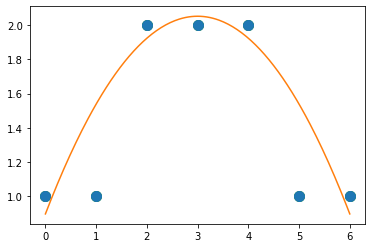

In [13]:
plt.plot([0,1,2,3,4,5,6], [1,1,2,2,2,1,1], 'g', marker = 'o', markersize=10, linestyle="")

speed = np.array([0, 1, 2, 3, 4, 5, 6])
performance = np.array([1, 1, 2, 2, 2, 1, 1])

a = np.array([[1, 0, 0, 0], [1, 1, 1, 1], [1, 2, 4, 8], [1, 3, 9, 27], 
              [1, 4, 16, 64], [1, 5, 25, 125], [1, 6, 36, 216]])
b = performance
c = np.array([[6, 18, 72, 324]])
d = np.array([10])

u, s, vt = np.linalg.svd(c)
x1 = (u.T @ d / s) * vt.T[0]

vn = vt.T[:,1:]
avn = a @ vn
rhs = b - a @ x1

q, r = qr(avn)
qtb = q.T @ rhs
soln = solve_triangular(r[:3], qtb[:3])
soln = x1 + vn @ soln

xp = np.linspace(0, 6, 201)
plt.plot(speed, performance, marker = 'o', markersize=10, linestyle="")
yp = soln[0] + xp * (soln[1] + xp * (soln[2] + xp * soln[3]))
plt.plot(xp, yp)
print("coeffs:", soln[3], "x^3 + ", soln[2], "x^2 + ", soln[1], "x + ", soln[0])